In [14]:
# Multiple Linear Regression Example
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head(10)

,show_id,type,title,director,casts,country,date_added,release_year,rating,duration,listed_in,description
0,s8424,TV Show,The Minimighty Kids,NaN,NaN,France,15-04-2018,2012,TV-G,2 Seasons,"Kids' TV, TV Comedies","Some have big feet or a sniffly nose, others a..."
1,s7522,TV Show,Mr. Young,NaN,"Brendan Meyer, Matreya Fedor, Gig Morton, Kurt...",Canada,16-04-2019,2013,TV-G,2 Seasons,"Kids' TV, TV Comedies","After Adam graduates from college at age 14, h..."
2,s7343,TV Show,Lost Girl,NaN,"Anna Silk, Kris Holden-Ried, Ksenia Solo, Rich...",Canada,17-04-2016,2015,TV-14,5 Seasons,"TV Dramas, TV Horror, TV Mysteries",Discovering she's a succubus who sustains hers...
3,s8258,TV Show,The Cravings,NaN,"Park Hee-bon, Phillip Choi, Hong Wan-pyo, Choi...",South Korea,20-04-2017,2016,TV-14,2 Seasons,"International TV Shows, Korean TV Shows, TV Co...",Thirtysomething career woman Jae-yeong attempt...
4,s6461,TV Show,Chewing Gum,NaN,"Michaela Coel, John Macmillan, Robert Lonsdale...",United Kingdom,04-04-2017,2017,TV-MA,2 Seasons,"British TV Shows, International TV Shows, Roma...","The virginal Tracey, who was raised in a stric..."
5,s8685,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,01-08-2017,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
6,s8071,TV Show,Splash and Bubbles,NaN,"John Tartaglia, Leslie Carrara-Rudolph, Raymon...",United States,13-08-2018,2018,TV-Y,2 Seasons,Kids' TV,"Curious pals Splash, Bubbles, Dunk and Ripple ..."
7,s6872,TV Show,Gomorrah,NaN,"Marco D'Amore, Fortunato Cerlino, Salvatore Es...","Italy, Germany",21-08-2017,2016,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",Mafia activity in Naples is at the center of t...
8,s7706,TV Show,Paranormal Survivor,NaN,NaN,Canada,04-08-2017,2016,TV-14,2 Seasons,Docuseries,"In interviews and reenactments, ordinary peopl..."
9,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,04-08-2017,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."


In [4]:
# 2. Choose target variable (Example: predict 'duration' in minutes)
# First, you might need to preprocess duration from text like '90 min' to int
df['duration'] = df['duration'].str.replace(' min', '').str.replace(' Season', '').str.replace(' Seasons', '')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

In [5]:
# Drop rows with missing target
df = df.dropna(subset=['duration'])


In [6]:
# 3. Select features
features = ['type', 'director', 'casts', 'country', 'release_year', 'rating', 'listed_in']
X = df[features]
y = df['duration']

In [7]:
# 4. Preprocess categorical features
categorical_features = ['type', 'director', 'casts', 'country', 'rating', 'listed_in']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # keep release_year as is
)

In [8]:
# 5. Create and train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type', 'director', 'casts',
                                                   'country', 'rating',
                                                   'listed_in'])])),
                ('regressor', LinearRegression())])

In [10]:
# 6. Predict and evaluate
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 21.477384275656433
R² Score: 0.8030598515078695


In [11]:
# 7. Example prediction
sample_input = pd.DataFrame([{
    'type': 'Movie',
    'director': 'Martin Scorsese',
    'casts': 'Robert De Niro, Al Pacino',
    'country': 'United States',
    'release_year': 2019,
    'rating': 'PG-13',
    'listed_in': 'Dramas, Crime Movies'
}])

In [12]:
predicted_duration = model.predict(sample_input)
print("Predicted Duration (minutes):", predicted_duration[0])

Predicted Duration (minutes): 130.1364817144598


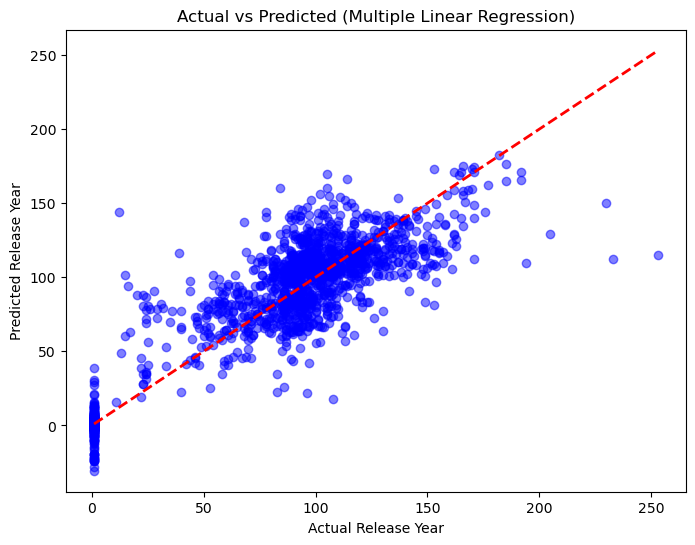

In [17]:
# Scatter plot of actual vs predicted release_year
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # reference line

plt.xlabel("Actual Release Year")
plt.ylabel("Predicted Release Year")
plt.title("Actual vs Predicted (Multiple Linear Regression)")
plt.show()